In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts')
import pmixSample
import matplotlib.colors as colors
import matplotlib.cbook as cbook

In [2]:
# Pressure, Temperature, phi(stoichiometric ratio)
one_atm = 101325
TempMax = 1000./0.8 #1200; #K
TempMin = 800 #1300; #K

phiMax = 0.5; # 
phiMin = 3; # 

one_atm = 101325

Pressure = one_atm

In [3]:
Npt = 200
Npphi = 200
N = Npt*Npt

temperature = np.linspace(TempMin, TempMax, Npt)
eqratio     = np.linspace(phiMin, phiMax, Npphi)
temp, phi = np.meshgrid(temperature,eqratio)

temp = temp.reshape(np.size(temp))#flatten()
phi  = phi.reshape(np.size(phi))#flatten()

In [4]:
Nvar = 6
sample = np.zeros([N,Nvar])
fuel ="CH4"
nC=1

In [5]:
for i in range(N):
    sample[i,0] = temp[i]
    sample[i,1] = Pressure
    Yp_fuel, Yr_o2, Yr_n2, Yr_ar = pmixSample.getMassFraction(nC,phi[i])
    sample[i,2] = Yp_fuel
    sample[i,3] = Yr_o2
    sample[i,4] = Yr_n2 
    sample[i,5] = Yr_ar

In [6]:
savedir = ''
header_fuel = "T P "+fuel+" O2 N2 AR"
np.savetxt(savedir+'sample.dat',sample,header=header_fuel,comments='')

In [7]:
cpMass = np.loadtxt('CpMixMass.dat')

In [8]:
def plotResults(x, y, z, name_title , x_label_name,y_label_name,\
                xtickvalues=None,ytickvalues=None,cticks=None,cticklabels=None,fs_label=22,fs_tick=20):
    fig, ax2 = plt.subplots(figsize=(10,8), nrows=1)
    ax2.tricontour(x, y, z, 14, linewidths=0.5,  colors='k')
    cntr2 = ax2.tricontourf(x, y, z,14, cmap="RdBu_r")
    if cticks is not None:
        cbar = fig.colorbar(cntr2, ax=ax2, ticks=cticks)    
    else:
        cbar = fig.colorbar(cntr2, ax=ax2)
    if cticklabels is not None:
        cbar.ax.set_yticklabels(cticklabels) 
    cbar.ax.tick_params(labelsize=fs_label)
    cbar.ax.set_ylabel(name_title,fontsize=fs_label+2)
    cbar.ax.tick_params(labelsize=fs_label)
#     ax2.set_title(name_title  )
    plt.subplots_adjust(hspace=0.5)
    ax2.set_xlabel(x_label_name,fontsize=fs_label)
    ax2.set_ylabel(y_label_name,fontsize=fs_label) 
    if xtickvalues is not None:
        ax2.set_xticks(xtickvalues)
    if ytickvalues is not None:
        ax2.set_yticks(ytickvalues)
    for tick in ax2.xaxis.get_major_ticks()+ax2.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs_tick)
    return 

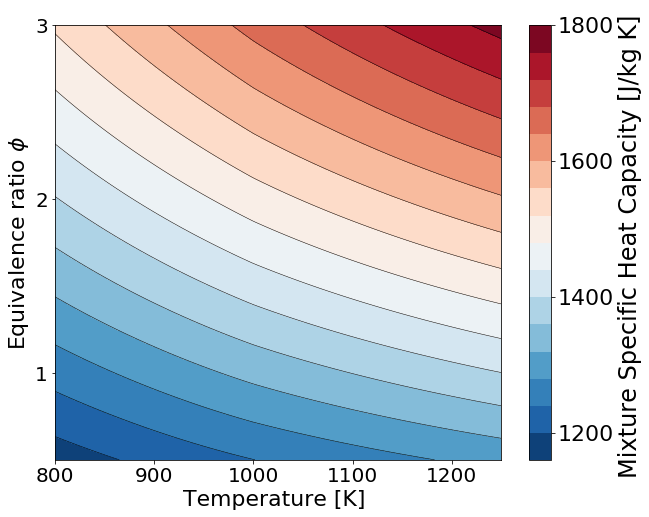

In [9]:
plotResults(temp, phi, cpMass, 'Mixture Specific Heat Capacity [J/kg K] ',\
            x_label_name='Temperature [K] ',y_label_name='Equivalence ratio $\phi$',\
            xtickvalues=[800,900,1000,1100,1200],ytickvalues=[1,2,3],cticks=[1200,1400,1600,1800])
plt.savefig('MixtureSpecificHeatCapacity.pdf')

In [10]:
HMass = np.genfromtxt('EnthalpyMixMass.dat')

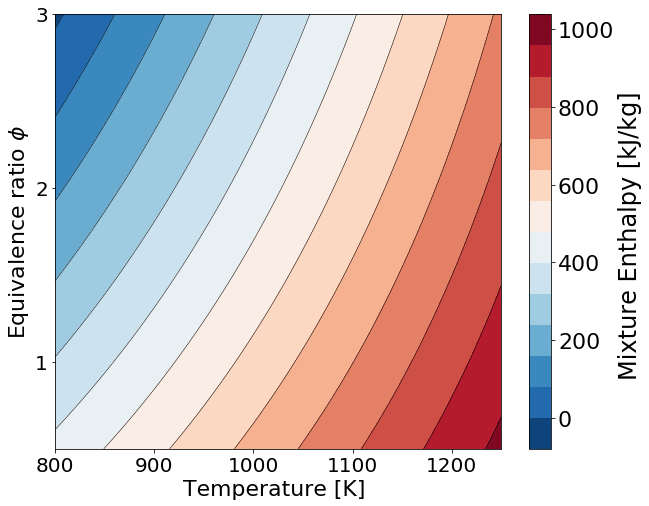

In [11]:
plotResults(temp, phi, HMass/1000, 'Mixture Enthalpy [kJ/kg] ' ,\
            x_label_name='Temperature [K] ',y_label_name='Equivalence ratio $\phi$',\
            xtickvalues=[800,900,1000,1100,1200],ytickvalues=[1,2,3],\
            cticks=[0,2e2,4e2,6e2,8e2,1e3])
plt.savefig('MixtureEnthalpy.pdf')